Name : Kunal Mody

Batch - DS2312

### Temperature Forecast Project using ML
##### Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

###### Attribute Information:
For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

###### You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [73]:
df.shape

(7752, 25)

In [74]:
df.head(15)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [75]:
df.tail(15)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7737,13.0,30-08-2017,23.8,17.1,28.521656,81.337837,27.094065,17.444269,5.693622,48.882029,...,0.000000,0.000000,0.000000,37.5776,127.083,59.8324,2.686500,4434.277832,27.8,17.4
7738,14.0,30-08-2017,23.1,17.2,21.468115,74.958038,27.659242,18.721456,6.990299,17.905112,...,0.000000,0.000000,0.000000,37.4967,126.927,30.9680,0.618000,4445.691406,27.5,17.2
7739,15.0,30-08-2017,23.4,16.1,22.562298,75.351555,27.451492,18.612977,7.041802,20.186169,...,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.855200,4470.393066,27.2,17.5
7740,16.0,30-08-2017,21.7,15.2,27.868839,85.979271,26.400334,17.217080,6.395609,82.487679,...,0.000000,0.000000,0.000000,37.4697,126.995,82.2912,2.257900,4406.334473,25.9,15.7
7741,17.0,30-08-2017,22.6,14.6,35.059216,89.616730,26.112684,16.446214,5.147585,118.735384,...,0.000000,0.000000,0.000000,37.6181,127.099,53.4712,0.697000,4460.537109,26.8,12.9
7742,18.0,30-08-2017,23.3,18.2,30.259682,86.565193,26.474403,17.289157,6.522731,94.203783,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.231300,4435.611816,27.8,16.7
7743,19.0,30-08-2017,22.6,15.0,25.536045,78.779045,26.596280,17.856040,6.905963,54.030075,...,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.767800,4495.473633,27.1,16.6
7744,20.0,30-08-2017,22.7,15.9,38.216373,94.428116,24.037222,15.772677,6.478060,112.580310,...,0.000000,0.000000,0.000000,37.6181,127.004,146.5540,4.729600,4554.965332,26.7,16.3
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.572100,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [77]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [78]:
df=df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7752.0,13.000000,7.210637,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7752.0,29.768211,2.956557,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7752.0,23.225059,2.403036,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7752.0,56.759372,14.596973,19.794666,46.046162,55.313244,67.038254,98.524734
LDAPS_RHmax,7752.0,88.374804,7.157124,58.936283,84.316923,89.699505,93.704500,100.000153
LDAPS_Tmax_lapse,7752.0,29.613447,2.932898,17.624954,27.693091,29.662273,31.683819,38.542255
LDAPS_Tmin_lapse,7752.0,23.512589,2.333973,14.272646,22.114651,23.735942,25.134000,29.619342
LDAPS_WS,7752.0,7.097875,2.173245,2.882580,5.686487,6.563068,8.007471,21.857621
LDAPS_LH,7752.0,62.505019,33.567001,-13.603212,37.532764,57.310630,83.904586,213.414006
LDAPS_CC1,7752.0,0.368774,0.261185,0.000000,0.148321,0.320110,0.571696,0.967277


In [80]:
#unique values
df.nunique().to_frame('Total of Unique values')

,Total of Unique values
station,25
Date,310
Present_Tmax,168
Present_Tmin,156
LDAPS_RHmin,7673
LDAPS_RHmax,7665
LDAPS_Tmax_lapse,7676
LDAPS_Tmin_lapse,7676
LDAPS_WS,7676
LDAPS_LH,7676


In [81]:
#skewness
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

In [82]:
#heatmap to see corelation

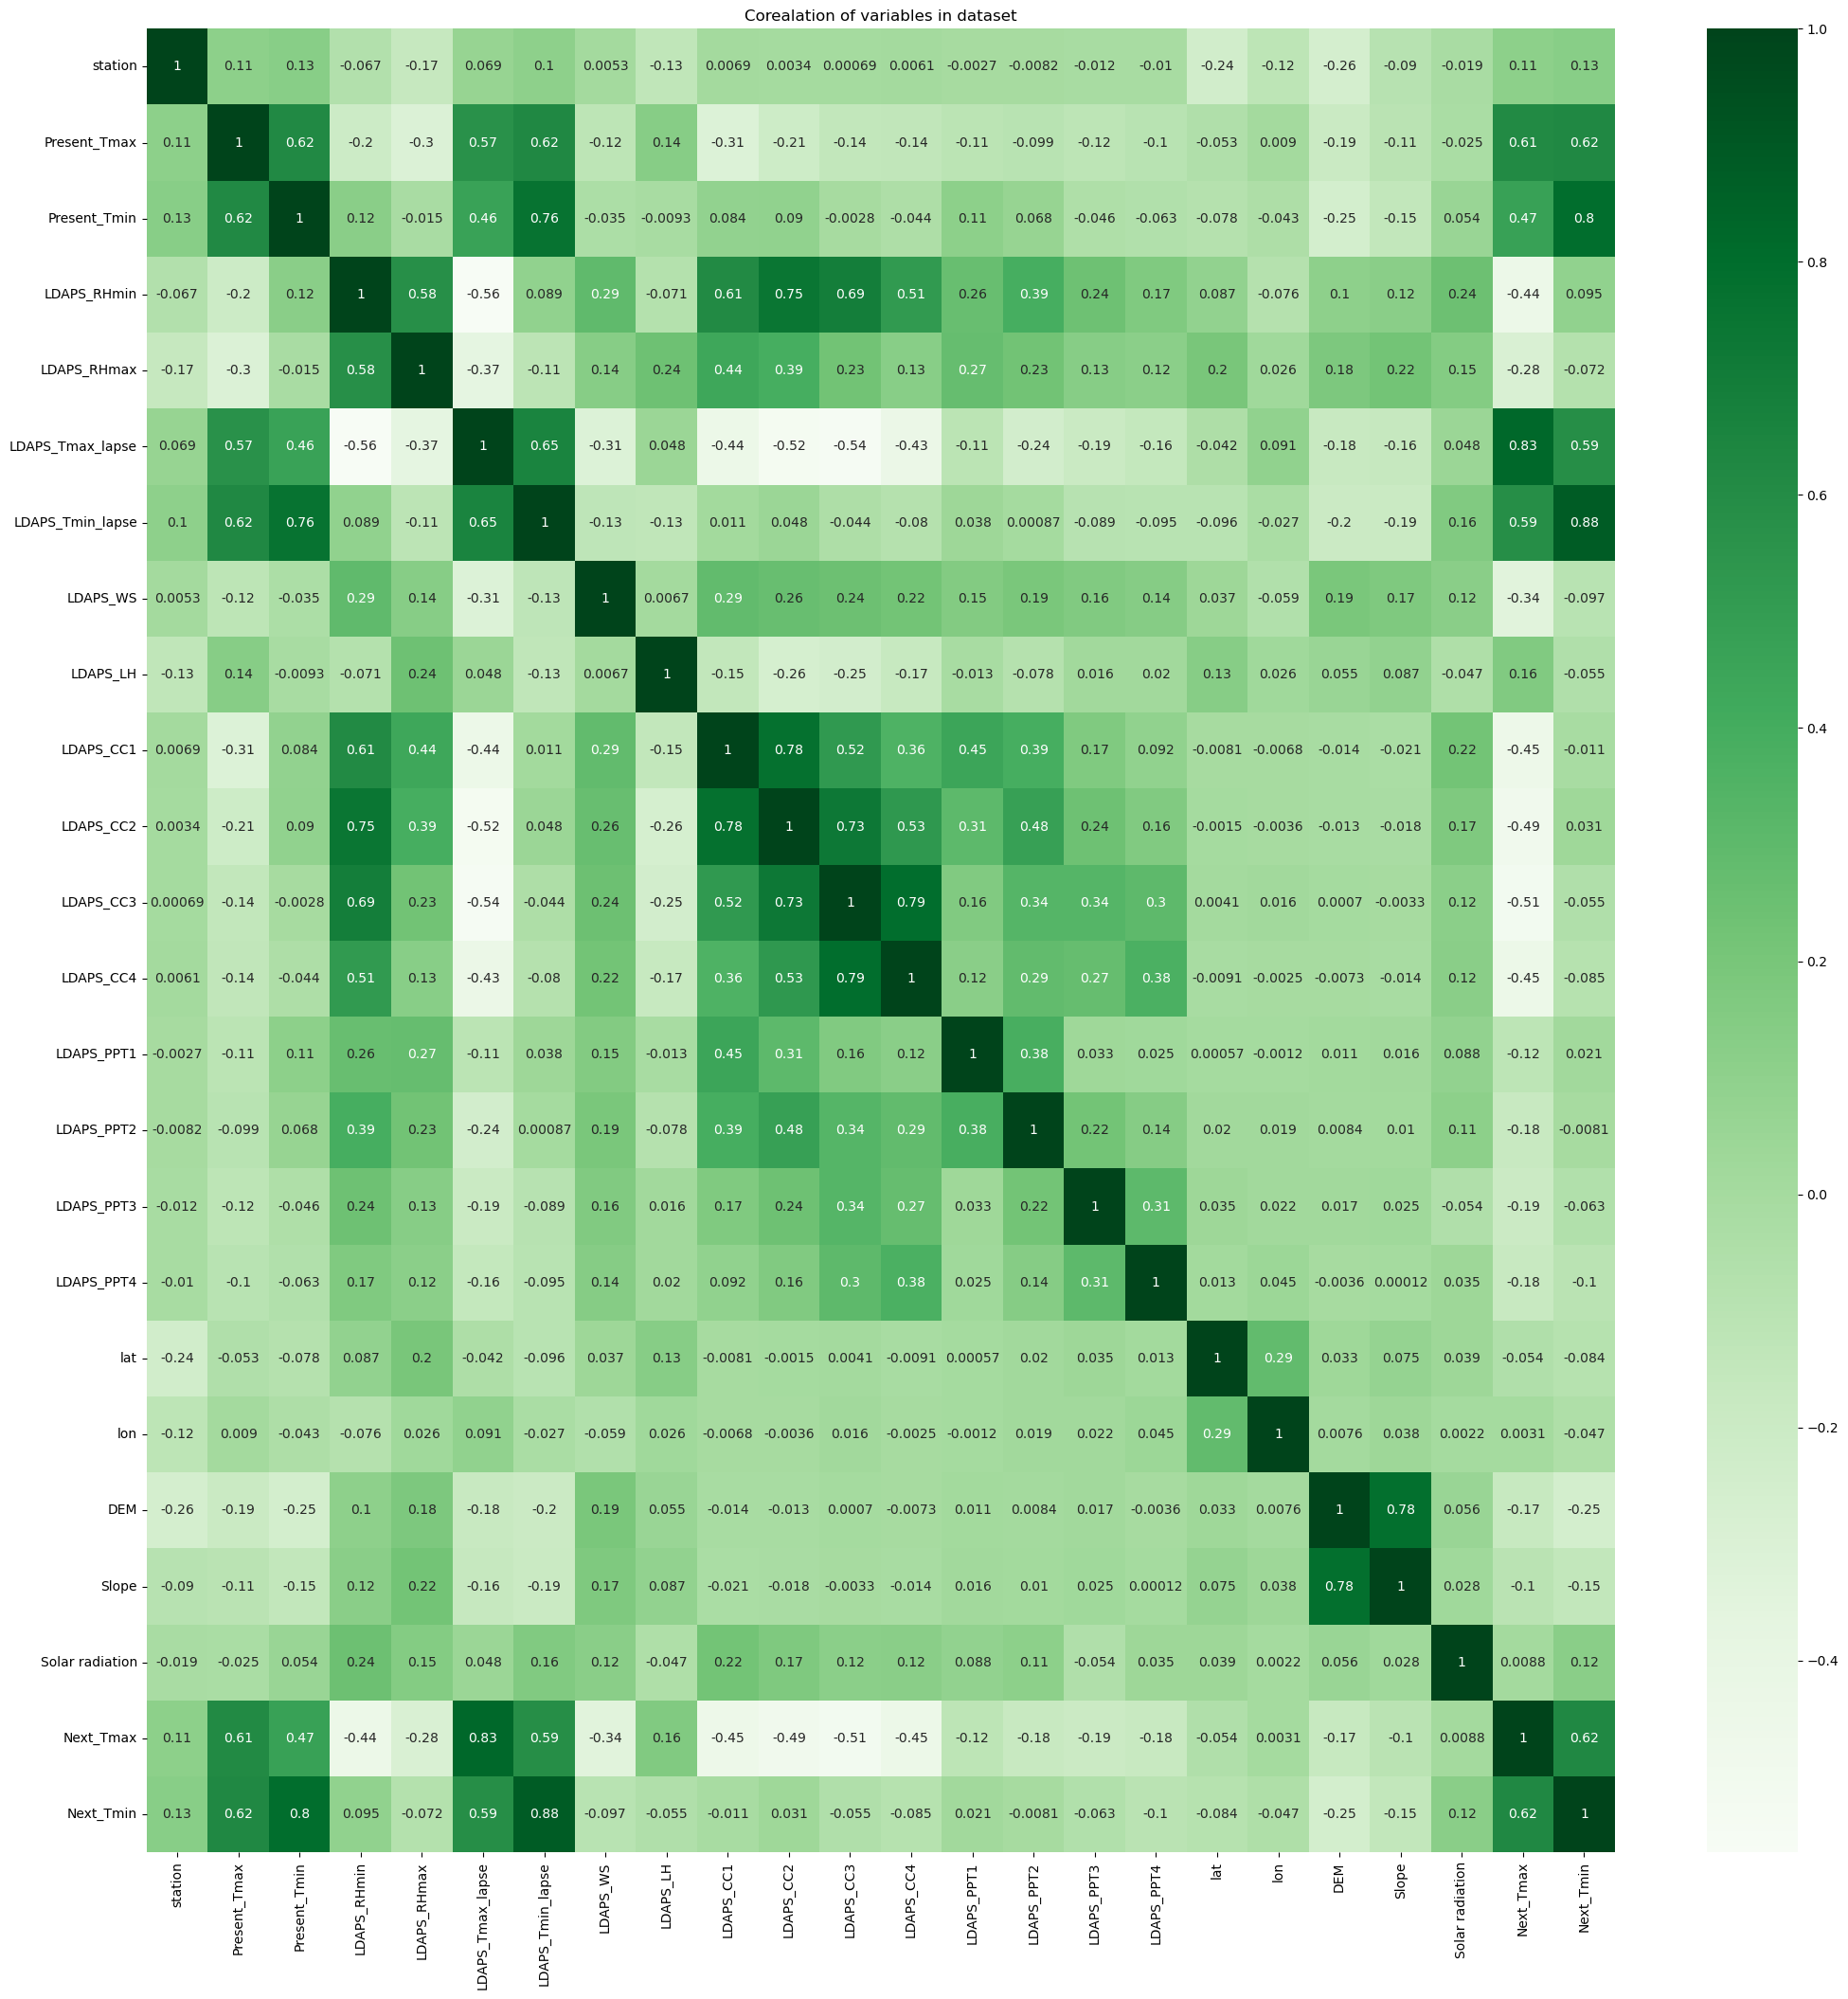

In [83]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot =True, cmap = 'Greens')
plt.title('Corealation of variables in dataset')
plt.show()

In [84]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,...,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
Present_Tmax,0.112655,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,...,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,0.131646,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,...,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066733,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.166984,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069107,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,0.005277,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.133357,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440
LDAPS_CC1,0.006919,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028


In [85]:
# now checking columns which are highly related

In [86]:
df1= df.copy()

In [87]:
corr_matrix = df1.corr()
p =0.9 
highly_corr = set()
for i in range(len(corr_matrix.columns)):
    for m in range(i):
        if abs(corr_matrix.iloc[i,m])> p:
            col_name =corr_matrix.columns[i]
            highly_corr.add(col_name)
print(' Highly Correlated columns to drop -', highly_corr)

df1_dropped = df.drop(columns = highly_corr)

 Highly Correlated columns to drop - set()


In [88]:
# so we can see that we have not got any columns which are highly correlated with each other in given dataset

In [89]:
# now we will check for data distribution using histplot

<Axes: xlabel='station', ylabel='Count'>

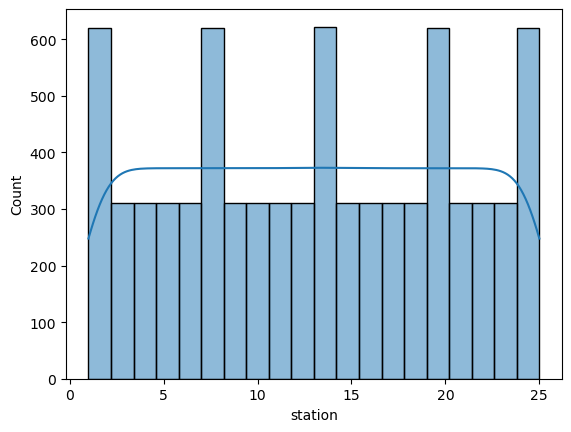

In [90]:
sns.histplot(df['station'], kde=True)

<Axes: xlabel='Date', ylabel='Count'>

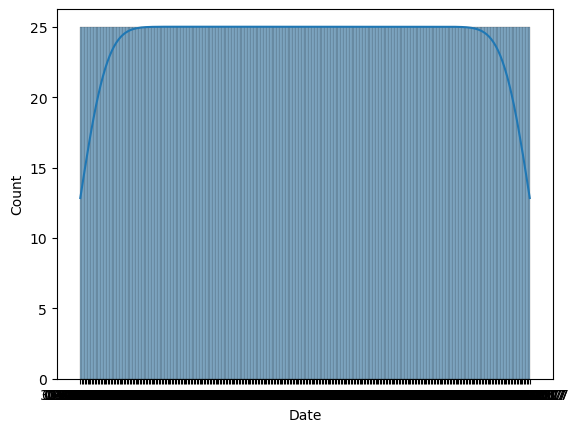

In [91]:
sns.histplot(df['Date'], kde =True)

<Axes: xlabel='Present_Tmax', ylabel='Count'>

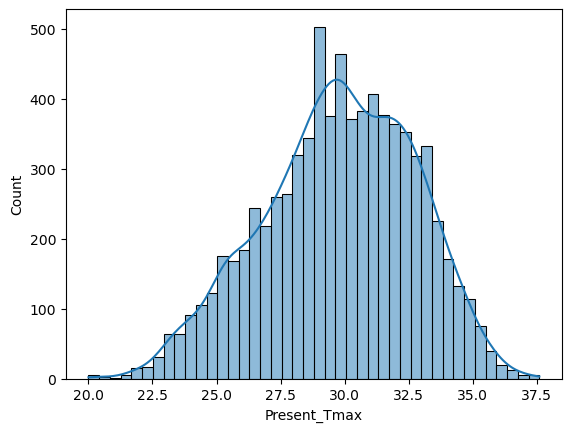

In [92]:
sns.histplot(df['Present_Tmax'], kde=True)

<Axes: xlabel='Present_Tmin', ylabel='Count'>

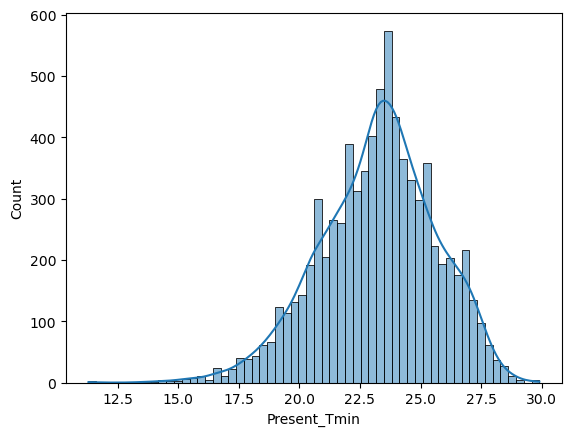

In [93]:
sns.histplot(df['Present_Tmin'], kde =True)

<Axes: xlabel='LDAPS_RHmin', ylabel='Count'>

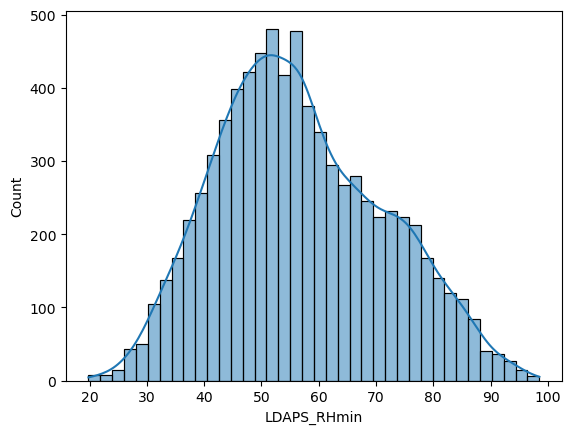

In [94]:
sns.histplot(df['LDAPS_RHmin'], kde=True)

<Axes: xlabel='LDAPS_RHmax', ylabel='Count'>

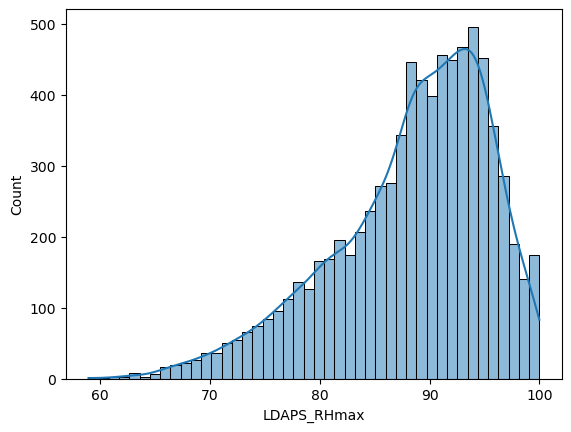

In [95]:
sns.histplot(df['LDAPS_RHmax'], kde=True)

<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Count'>

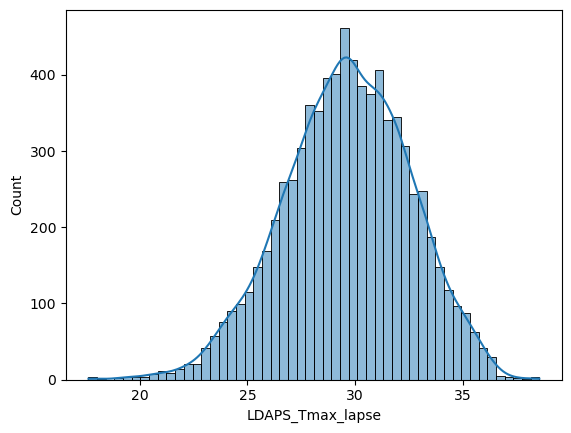

In [96]:
sns.histplot(df['LDAPS_Tmax_lapse'], kde=True)

<Axes: xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

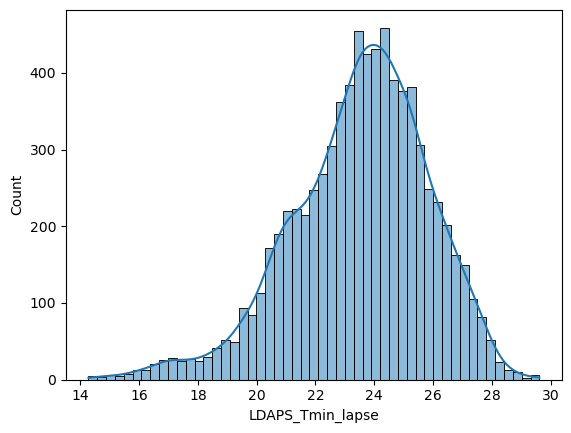

In [97]:
sns.histplot(df['LDAPS_Tmin_lapse'], kde=True)

<Axes: xlabel='LDAPS_WS', ylabel='Count'>

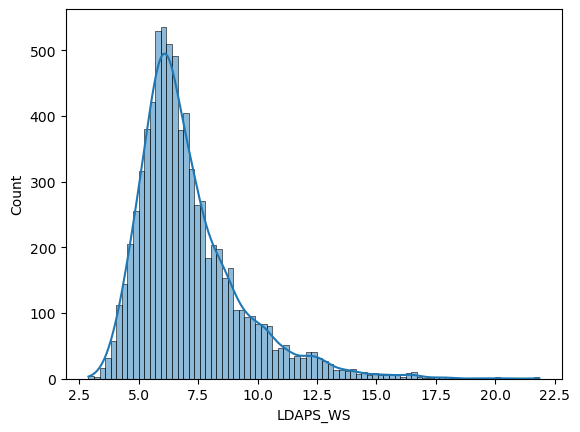

In [98]:
sns.histplot(df['LDAPS_WS'],kde=True)

<Axes: xlabel='LDAPS_LH', ylabel='Count'>

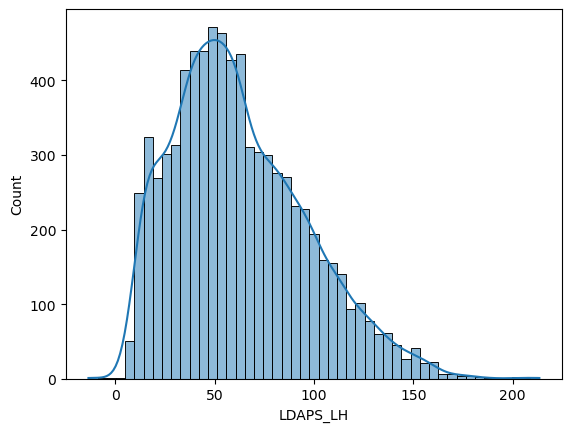

In [99]:
sns.histplot(df['LDAPS_LH'],kde=True)

<Axes: xlabel='LDAPS_CC1', ylabel='Count'>

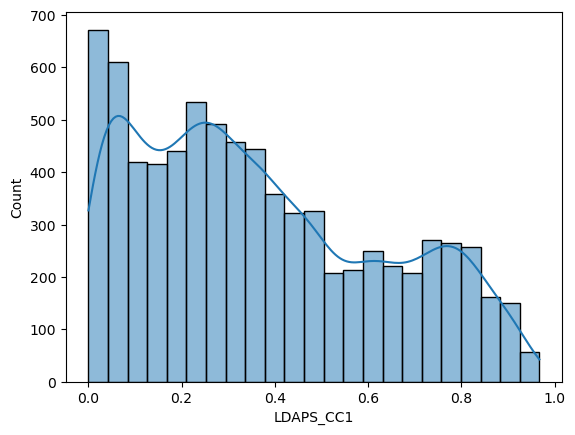

In [100]:
sns.histplot(df['LDAPS_CC1'], kde=True)

<Axes: xlabel='LDAPS_CC2', ylabel='Count'>

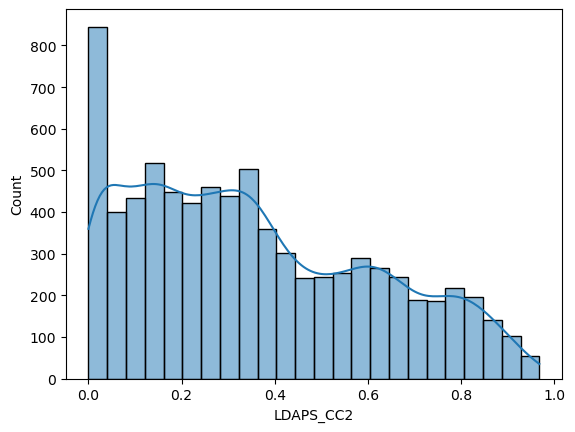

In [101]:
sns.histplot(df['LDAPS_CC2'], kde=True)

<Axes: xlabel='LDAPS_CC3', ylabel='Count'>

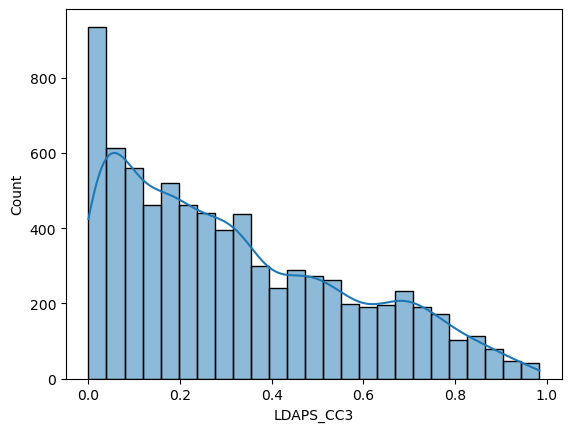

In [102]:
sns.histplot(df['LDAPS_CC3'], kde=True)

<Axes: xlabel='LDAPS_CC4', ylabel='Count'>

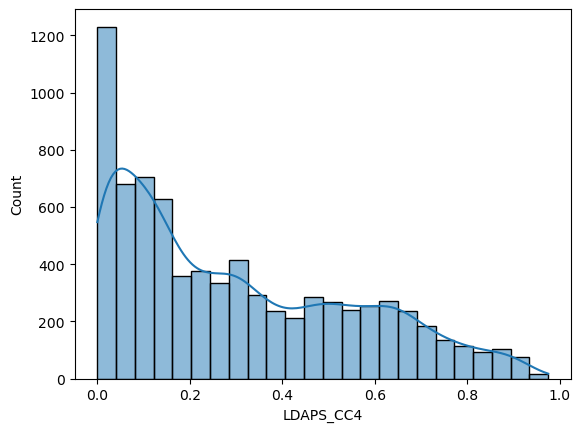

In [103]:
sns.histplot(df['LDAPS_CC4'], kde=True)

<Axes: xlabel='LDAPS_PPT1', ylabel='Count'>

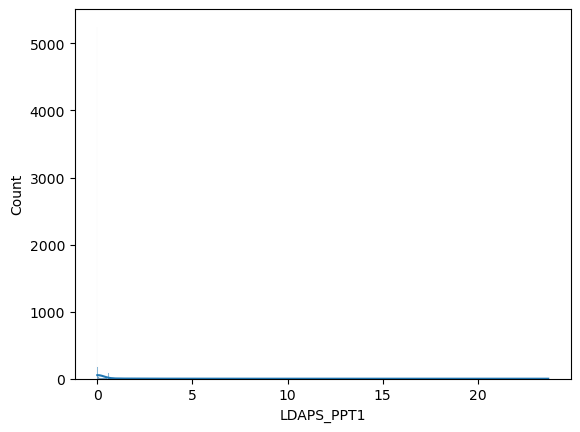

In [104]:
sns.histplot(df['LDAPS_PPT1'], kde=True)

<Axes: xlabel='LDAPS_PPT2', ylabel='Count'>

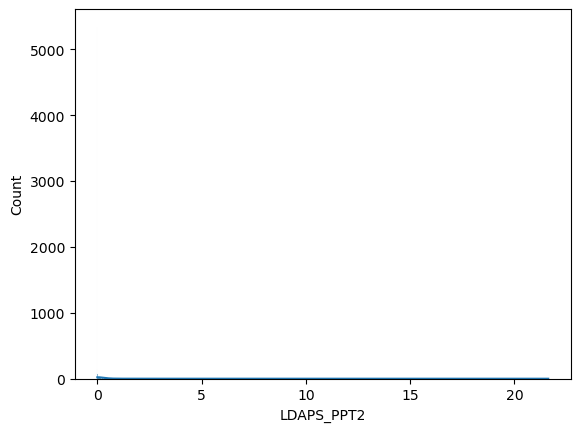

In [105]:
sns.histplot(df['LDAPS_PPT2'], kde=True)

<Axes: xlabel='LDAPS_PPT3', ylabel='Count'>

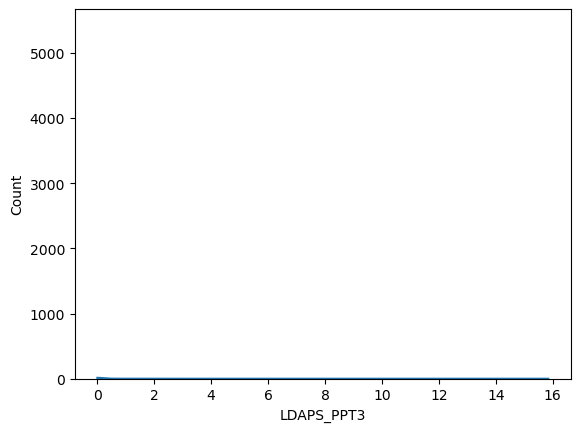

In [106]:
sns.histplot(df['LDAPS_PPT3'], kde=True)

In [107]:
# checking for outliers

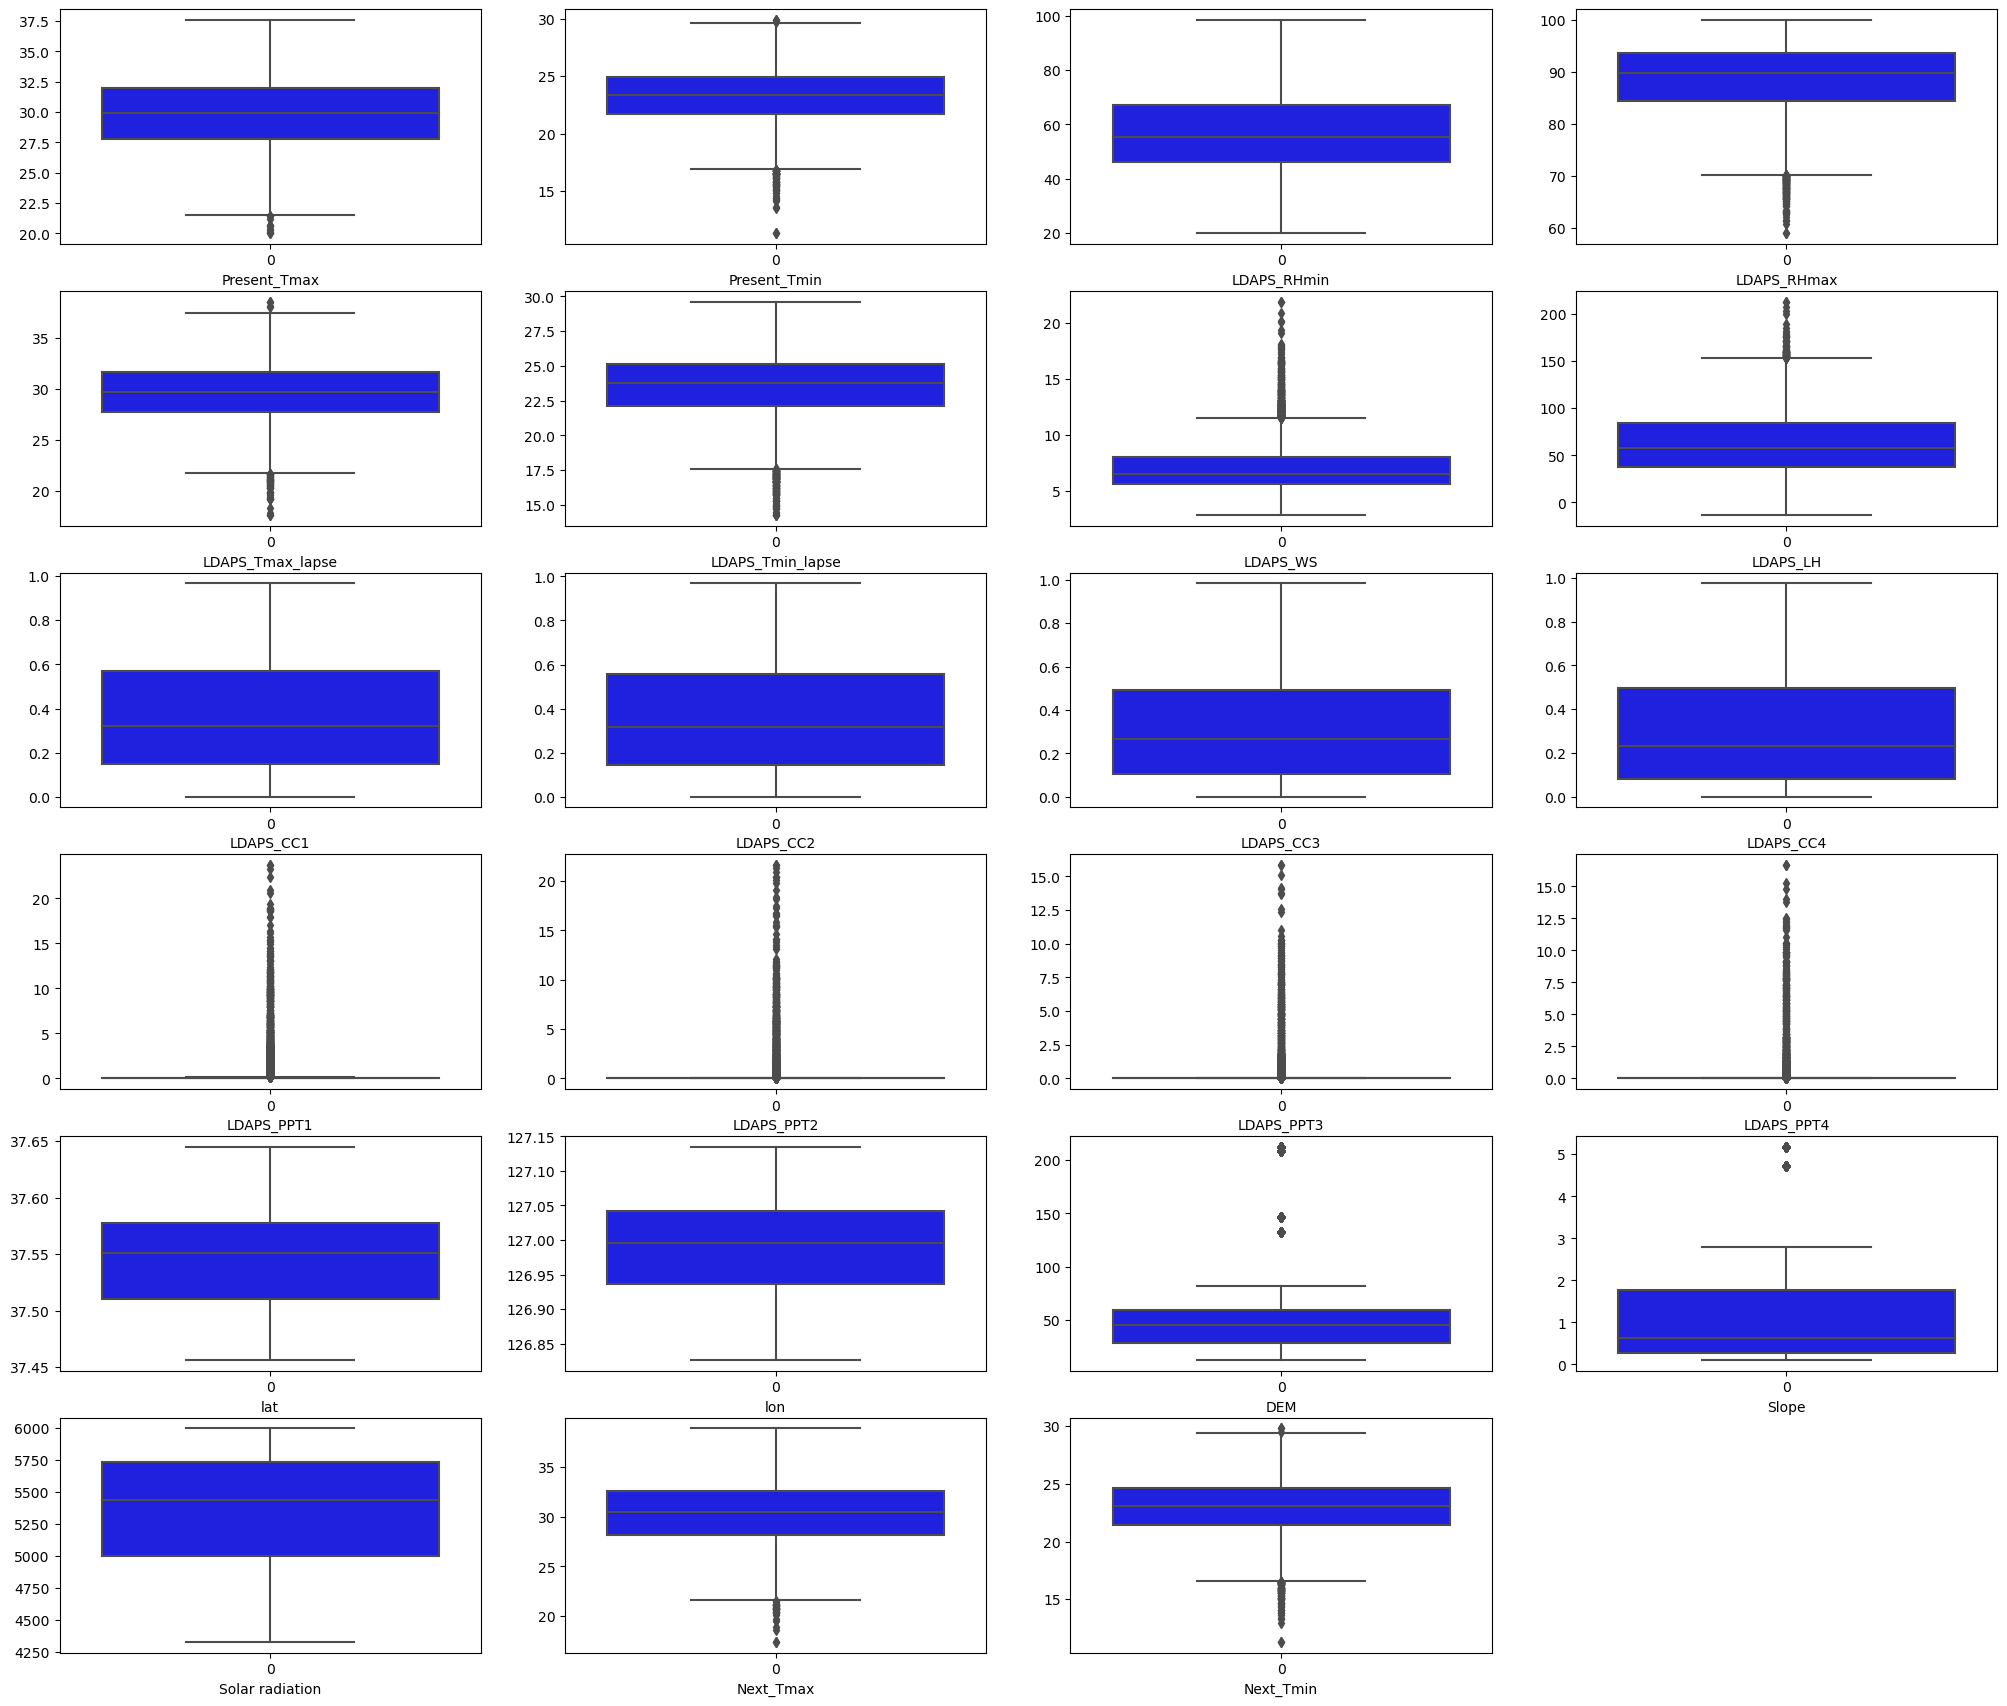

In [108]:
plt.figure(figsize=(25,25))
p=1
for i in df.columns[2:]: #checking from cloumn 2 as 1st is not useful
    if p<=26:
        plt.subplot(7,4,p)
        sns.boxplot(df[i], color ='b')
        plt.xlabel(i)
    p+=1
plt.show()

In [109]:
df1.shape

(7752, 25)

In [110]:
from scipy.stats  import zscore

In [111]:
numeric_col = df.select_dtypes(include='number').columns
df[numeric_col] = df[numeric_col].apply(zscore)
print(df[numeric_col])

       station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664315     -0.361326     -0.759529     0.102515     0.383078   
1    -1.525622      0.721084     -0.676296    -0.308027     0.311586   
2    -1.386929      0.619608      0.031188    -0.552814    -0.614982   
3    -1.248236      0.754909      0.072805     0.101426     1.133054   
4    -1.109544      0.551957     -0.551446    -0.040098     0.248765   
...        ...           ...           ...          ...          ...   
7747  1.386929     -2.187892     -2.549048    -2.056591    -1.328126   
7748  1.525622     -2.187892     -2.299348    -2.241619    -1.548184   
7749  1.664315     -2.221718     -2.424198    -2.317504    -1.555342   
7750  0.000000     -3.304127     -4.962817    -2.532517    -4.113443   
7751  0.000000      2.649126      2.777891     2.861419     1.624409   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.524889         -0.216663 -0.128382  0.2

In [112]:
o_l= (np.abs(df[numeric_col])>3).all(axis=1)
df = df[numeric_col][~o_l]
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,-1.664315,-0.361326,-0.759529,0.102515,0.383078,-0.524889,-0.216663,-0.128382,0.206966,-0.516243,...,-0.276489,-0.240636,-0.224453,1.189286,-0.005000,2.772243,1.115004,1.517935,-0.376282,-0.697599
1,-1.525622,0.721084,-0.676296,-0.308027,0.311586,0.080895,0.223848,-0.646994,-0.314841,-0.548557,...,-0.276489,-0.240636,-0.224453,1.189286,0.511177,-0.315157,-0.542158,1.229950,0.072097,-0.174064
2,-1.386929,0.619608,0.031188,-0.552814,-0.614982,0.162936,0.451210,-0.441604,-1.249283,-0.610450,...,-0.276489,-0.240636,-0.224453,0.653021,0.838510,-0.526218,-0.723133,1.216534,0.264260,0.389744
3,-1.248236,0.754909,0.072805,0.101426,1.133054,0.031092,-0.079874,-0.666247,0.095997,-0.583539,...,-0.276489,-0.240636,-0.224453,1.991696,0.385280,-0.297588,0.932424,1.201176,0.456422,0.550832
4,-1.109544,0.551957,-0.551446,-0.040098,0.248765,-0.170325,-0.011187,-0.627154,1.354409,-0.832287,...,-0.276489,-0.240636,-0.224453,0.118743,1.807917,-0.494322,-0.548433,1.207205,0.296287,-0.174064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386929,-2.187892,-2.549048,-2.056591,-1.328126,-1.112066,-2.029679,-0.436683,0.284622,-1.297018,...,-0.276489,-0.240636,-0.224453,-0.149390,-1.263971,-0.852681,-0.803915,-2.093040,-0.632499,-1.946031
7748,1.525622,-2.187892,-2.299348,-2.241619,-1.548184,-0.887662,-2.047744,-0.255421,-0.454749,-1.274658,...,-0.276489,-0.240636,-0.224453,-0.417522,-1.037356,-0.821213,-0.755095,-2.104553,-0.536418,-1.664127
7749,1.664315,-2.221718,-2.424198,-2.317504,-1.555342,-0.570780,-2.137962,0.088072,-1.591397,-1.224577,...,-0.276489,-0.240636,-0.224453,-0.417522,-0.269384,-0.779043,-0.719338,-2.074325,-0.792634,-2.227935
7750,0.000000,-3.304127,-4.962817,-2.532517,-4.113443,-4.087857,-3.959146,-1.939757,-2.267499,-1.412018,...,-0.276489,-0.240636,-0.224453,-1.758184,-2.082302,-0.911963,-0.845455,-2.358212,-4.123453,-4.684525


In [113]:
# after removing outliers 

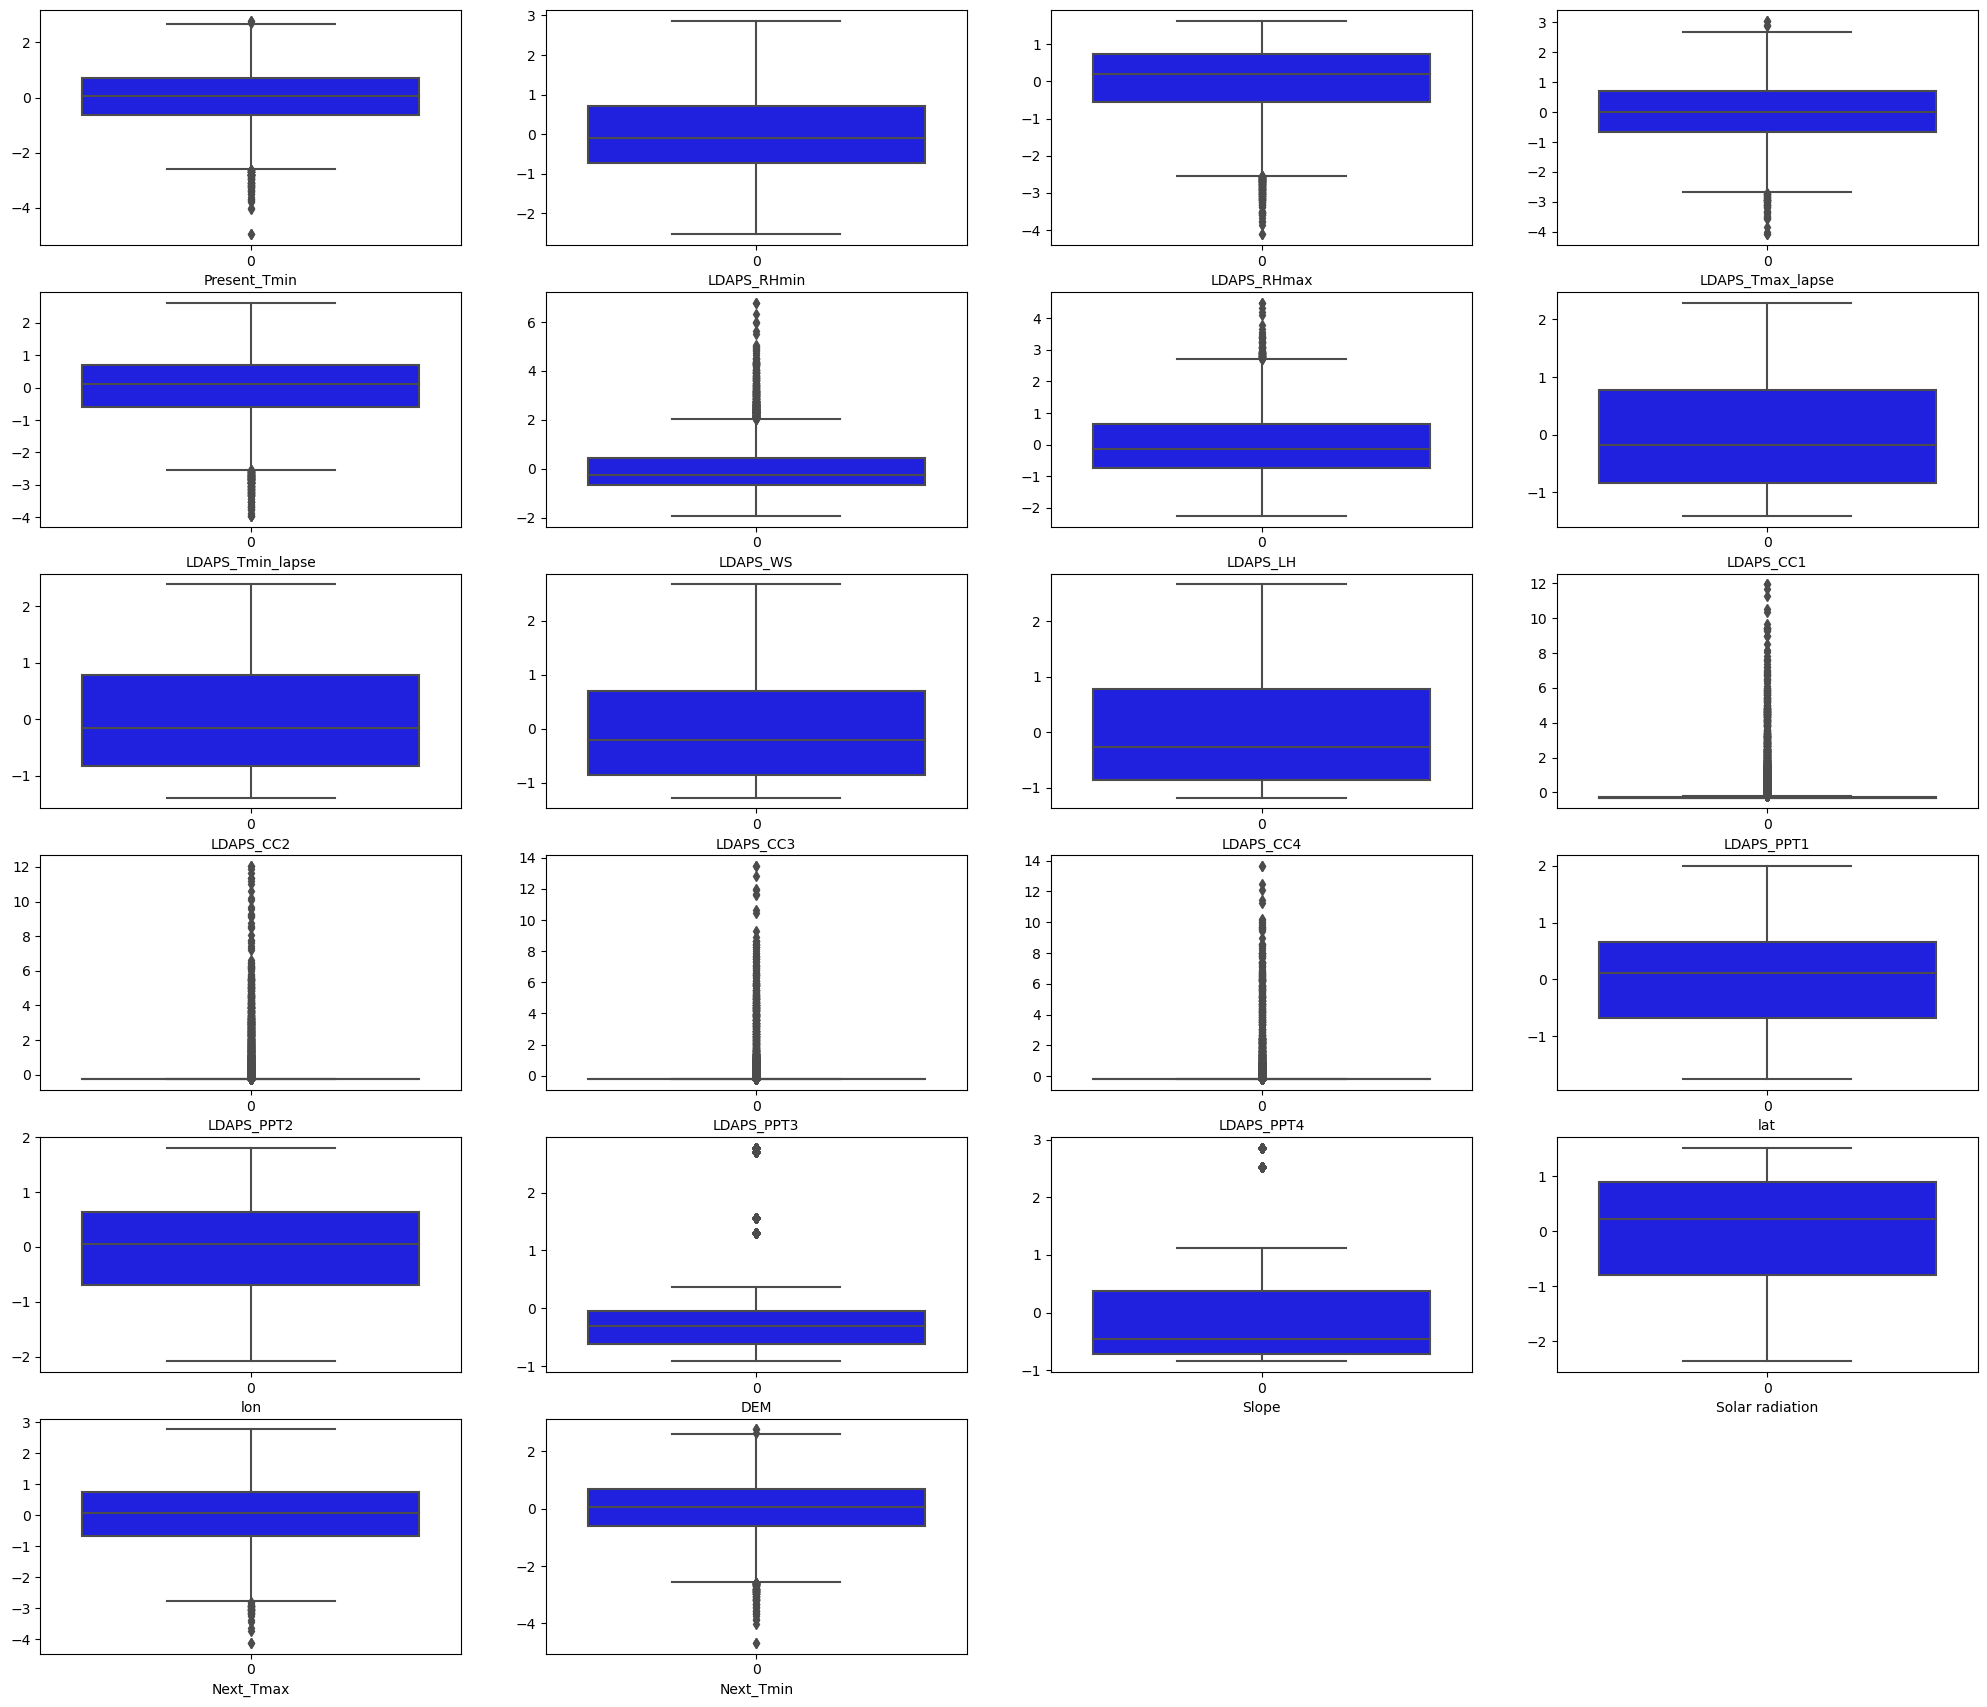

In [114]:
plt.figure(figsize=(25,25))
p=1
for i in df.columns[2:]: #checking from cloumn 2 as 1st is not useful
    if p<=26:
        plt.subplot(7,4,p)
        sns.boxplot(df[i], color ='b')
        plt.xlabel(i)
    p+=1
plt.show()

In [115]:
df.skew()

station            -1.604348e-17
Present_Tmax       -2.641372e-01
Present_Tmin       -3.675377e-01
LDAPS_RHmin         3.002198e-01
LDAPS_RHmax        -8.550145e-01
LDAPS_Tmax_lapse   -2.278795e-01
LDAPS_Tmin_lapse   -5.817633e-01
LDAPS_WS            1.579236e+00
LDAPS_LH            6.737574e-01
LDAPS_CC1           4.594578e-01
LDAPS_CC2           4.723498e-01
LDAPS_CC3           6.407354e-01
LDAPS_CC4           6.664816e-01
LDAPS_PPT1          5.393821e+00
LDAPS_PPT2          5.775355e+00
LDAPS_PPT3          6.457129e+00
LDAPS_PPT4          6.825464e+00
lat                 8.706184e-02
lon                -2.852130e-01
DEM                 1.723257e+00
Slope               1.563020e+00
Solar radiation    -5.112097e-01
Next_Tmax          -3.401999e-01
Next_Tmin          -4.044475e-01
dtype: float64

In [116]:
df1[numeric_col].keys()

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [117]:
from scipy.stats import skew,boxcox

In [118]:
df2=df1.copy() # we will take df1 as a main dataset and df2 as a copy of it for transforming data

In [119]:
numeric_cols =df1.select_dtypes(include=np.number).columns
for i in numeric_cols:
    skewness = skew(df1[i])
    if abs(skewness)>0.5:
        if skewness>0:
            df2[i] = np.log1p(df1[i])
        else:
            df2[i] = 1/(df1[i]+1)
print('Skweness of numeric column :')
print(df1[numeric_cols].apply(lambda x:skew(x)))

Skweness of numeric column :
station             0.000000
Present_Tmax       -0.264086
Present_Tmin       -0.367467
LDAPS_RHmin         0.300162
LDAPS_RHmax        -0.854849
LDAPS_Tmax_lapse   -0.227835
LDAPS_Tmin_lapse   -0.581651
LDAPS_WS            1.578930
LDAPS_LH            0.673627
LDAPS_CC1           0.459369
LDAPS_CC2           0.472258
LDAPS_CC3           0.640611
LDAPS_CC4           0.666353
LDAPS_PPT1          5.392777
LDAPS_PPT2          5.774237
LDAPS_PPT3          6.455880
LDAPS_PPT4          6.824144
lat                 0.087045
lon                -0.285158
DEM                 1.722924
Slope               1.562718
Solar radiation    -0.511111
Next_Tmax          -0.340134
Next_Tmin          -0.404369
dtype: float64


In [120]:
df=df1

In [121]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

In [122]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [123]:
# now getting data ready for training and testing

In [126]:
X= df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
Y= df['Next_Tmax']

In [127]:
df['Date'].isnull().sum()

2

In [129]:
df['Date'].nunique()

310

In [130]:
df['Date'].dtypes

dtype('O')

In [131]:
df['Date']=pd.to_datetime(df['Date'], errors ='coerce')

In [132]:
mean_date = df['Date'].mean()
df['Date'] = df['Date'].fillna(mean_date)

In [133]:
df['Date'].isnull().sum()

0

In [134]:
X=X.drop(['Date'],axis=1)

In [136]:
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508


In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.6643153 , -0.36132577, -0.75952931, ...,  2.77224286,
         1.11500407,  1.51793488],
       [-1.52562236,  0.72108401, -0.6762959 , ..., -0.31515742,
        -0.54215762,  1.22994952],
       [-1.38692941,  0.61960809,  0.03118815, ..., -0.52621832,
        -0.7231326 ,  1.21653443],
       ...,
       [ 1.6643153 , -2.22171758, -2.42419767, ..., -0.77904331,
        -0.71933797, -2.0743251 ],
       [ 0.        , -3.30412736, -4.9628169 , ..., -0.91196325,
        -0.8454552 , -2.35821196],
       [ 0.        ,  2.64912642,  2.77789093, ...,  2.77224286,
         2.86143459,  1.51793488]])

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [140]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.30)

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [142]:
minMSE =float('inf')
bestRandomState =0

In [143]:
for i in range(2, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    current_mse = mean_squared_error(Y_test, pred)
    
    if current_mse < minMSE:
        minMSE = current_mse
        bestRandomState = i

    print("Value of MSE is ", minMSE, " at Random State ", bestRandomState)

print("Minimum MSE is ", minMSE, " at Random State ", bestRandomState)

Value of MSE is  2.335925696103919  at Random State  2
Value of MSE is  2.2590718144681805  at Random State  3
Value of MSE is  2.217653708634151  at Random State  4
Value of MSE is  2.217653708634151  at Random State  4
Value of MSE is  2.217653708634151  at Random State  4
Value of MSE is  2.217653708634151  at Random State  4
Value of MSE is  2.217653708634151  at Random State  4
Value of MSE is  2.1682015311249647  at Random State  9
Value of MSE is  2.1682015311249647  at Random State  9
Value of MSE is  2.1682015311249647  at Random State  9
Value of MSE is  2.1682015311249647  at Random State  9
Value of MSE is  2.1682015311249647  at Random State  9
Value of MSE is  2.1682015311249647  at Random State  9
Value of MSE is  2.1682015311249647  at Random State  9
Value of MSE is  2.1682015311249647  at Random State  9
Value of MSE is  2.1682015311249647  at Random State  9
Value of MSE is  2.1682015311249647  at Random State  9
Value of MSE is  2.1682015311249647  at Random State  

In [144]:
# Minimum MSE is  2.1238226669730134  at Random State  79

In [145]:
#Linear Regression Model

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=79)
Lr=LinearRegression()
Lr.fit(X_train,Y_train)
pred_Lr=Lr.predict(X_test)
pred_train=Lr.predict(X_train)
print("r_2 score", r2_score(Y_test,pred_Lr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_Lr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_Lr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_Lr)))

r_2 score 0.7795135303787781
r_2 score on Training Data 0.7630343661079564
Mean Absolute Error: 1.1123698559210913
Mean Square Error: 2.1238226669730134
Root Square Error: 1.4573340958658085


In [147]:
#Random Forest Regressor

In [148]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_RFR ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_RFR ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_RFR))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_RFR)))

r_2 score 0.8981827404628174
r_2 score on Training Data 0.9849149694424142
Mean Absolute Error: 0.7302771656829923
Mean Square Error: 0.9807486330822416
Root Square Error: 0.9903275382832902


In [149]:
#KNN

In [150]:
knn=KNN()
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)
print("r_2 score", r2_score(Y_test,pred_knn ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_knn ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_knn))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_knn)))

r_2 score 0.8369652770703977
r_2 score on Training Data 0.8861251082577225
Mean Absolute Error: 0.9462811109534265
Mean Square Error: 1.5704221699245122
Root Square Error: 1.2531648614306548


In [151]:
#Gradient Boosting Regressor

In [152]:
gbb=GradientBoostingRegressor()
gbb.fit(X_train,Y_train)
pred_gbb=gbb.predict(X_test)
pred_train=gbb.predict(X_train)
print("r_2 score", r2_score(Y_test,pred_gbb ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_gbb)))

r_2 score 0.8499912888488357
r_2 score on Training Data 0.8693930368664304
Mean Absolute Error: 0.9193056808274167
Mean Square Error: 1.4449498943566268
Root Square Error: 1.202060686636339


In [153]:
#Lasso Model

In [154]:
lasso=Lasso()
lasso.fit(X_train, Y_train)
lasso.fit(X_train,Y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)
print("r_2 score", r2_score(Y_test,pred_lasso ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_lasso ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_lasso))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_lasso)))

r_2 score 0.5987834016434717
r_2 score on Training Data 0.5770976630372406
Mean Absolute Error: 1.5639768018585853
Mean Square Error: 3.8646947697936476
Root Square Error: 1.9658826948202295


In [155]:
#Ridge Model

In [156]:
rd=Ridge()
rd.fit(X_train,Y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)
print("r_2 score", r2_score(Y_test,pred_rd ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_rd ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_rd))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_rd)))

r_2 score 0.7795283947676983
r_2 score on Training Data 0.7630342508121428
Mean Absolute Error: 1.1122985971674695
Mean Square Error: 2.123679486640117
Root Square Error: 1.4572849709786062


In [157]:
#Decision Tree Regressor

In [158]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)
print("r_2 score", r2_score(Y_test,pred_dtr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_dtr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_dtr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_dtr)))

r_2 score 0.7443295181908374
r_2 score on Training Data 1.0
Mean Absolute Error: 1.1167775839183898
Mean Square Error: 2.462730549747744
Root Square Error: 1.5693089401860119


In [159]:
#SVR Model

In [160]:
svr= SVR()
svr.fit(X_train, Y_train)
svr.fit(X_train,Y_train)
pred_svr=svr.predict(X_test)
pred_train=svr.predict(X_train)
print("r_2 score", r2_score(Y_test,pred_svr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_svr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_svr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_svr)))

r_2 score 0.8498680580298779
r_2 score on Training Data 0.865317822038691
Mean Absolute Error: 0.8652068459473387
Mean Square Error: 1.446136907813833
Root Square Error: 1.202554326346146


In [161]:
#Extra Trees Regressor

In [162]:
etr=ExtraTreesRegressor()
etr.fit(X_train,Y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)
print("r_2 score", r2_score(Y_test,pred_etr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_etr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_etr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_etr)))

r_2 score 0.9178616233697339
r_2 score on Training Data 0.9999999996614221
Mean Absolute Error: 0.6585575005495772
Mean Square Error: 0.7911929762194123
Root Square Error: 0.8894902901209278


In [164]:
#Difference between R2 score of LR and CVS

In [185]:
score=cross_val_score(Lr, X, Y, cv=5, scoring='r2')
print('CV Score is:', score)
print('Mean of CVS is :', score.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_Lr )- score.mean())

CV Score is: [0.67058987 0.66420462 0.70194815 0.79039559 0.68861246]
Mean of CVS is : 0.7031501370168677
Difference between r_2 score and Cross Validation score is 0.07636339336191045


In [166]:
# R2 score of RFR and CVS

In [186]:
score1=cross_val_score(RFR, X, Y, cv=5, scoring='r2')
print('CV Score is:',score1)
print('Mean of CVS is :',score1.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_RFR )- score1.mean())

CV Score is: [0.7056307  0.64813619 0.64227977 0.79683025 0.64382619]
Mean of CVS is : 0.6873406203846006
Difference between r_2 score and Cross Validation score is 0.2108421200782168


In [172]:
#R2 score of KNN and CVS

In [187]:
score2=cross_val_score(knn, X, Y, cv=5, scoring='r2')
print('CV Score is:',score2)
print('Mean of CVS is:', score2.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_knn )- score2.mean())

CV Score is: [0.62521207 0.47910265 0.4838703  0.67663081 0.59849687]
Mean of CVS is: 0.5726625407340059
Difference between r_2 score and Cross Validation score is 0.2643027363363918


In [174]:
#R2 score of GB and CVS

In [188]:
score3=cross_val_score(gbb, X, Y, cv=5, scoring='r2')
print('CV Score is :',score3)
print('Mean of CVS is :',score3.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_gbb )- score3.mean())

CV Score is : [0.70509145 0.68488154 0.664796   0.79331264 0.65999092]
Mean of CVS is : 0.7016145107451317
Difference between r_2 score and Cross Validation score is 0.14837677810370398


In [177]:
#R2 score of Lasso and CVS

In [189]:
score4=cross_val_score(lasso, X, Y, cv=5, scoring='r2')
print('CV score is:',score4)
print('Mean of CVS is :',score4.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso )- score4.mean())

CV score is: [0.51030112 0.52842276 0.57088811 0.50824963 0.5889158 ]
Mean of CVS is : 0.5413554856585971
Difference between r_2 score and Cross Validation score is 0.05742791598487451


In [179]:
#R2 score of Ridge and CVS

In [190]:
score5=cross_val_score(rd, X, Y, cv=5, scoring='r2')
print('CV score is:', score5)
print('Mean of CVS is :',score5.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso )- score5.mean())

CV score is: [0.67068701 0.66412873 0.70192455 0.79044189 0.68866173]
Mean of CVS is : 0.7031687807990722
Difference between r_2 score and Cross Validation score is -0.10438537915560053


In [181]:
#R2 score of DTR and CVS

In [191]:
score6=cross_val_score(dtr, X, Y, cv=5, scoring='r2')
print('CV score is:',score6)
print('Mean of CVS is :',score6.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_dtr )- score6.mean())

CV score is: [0.3846607  0.47477344 0.32375201 0.60142511 0.43968637]
Mean of CVS is : 0.4448595261231292
Difference between r_2 score and Cross Validation score is 0.2994699920677082


In [168]:
#R2 score of SVR and CVS

In [192]:
score7=cross_val_score(svr, X, Y, cv=5, scoring='r2')
print('CV score is:', score7)
print('Mean of CVS is :',score7.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_svr )- score7.mean())

CV score is: [0.64089808 0.60978118 0.68563776 0.73675027 0.65876242]
Mean of CVS is : 0.6663659420948759
Difference between r_2 score and Cross Validation score is 0.18350211593500199


In [170]:
# R2 score of ETR and CVS

In [193]:
score8=cross_val_score(etr, X, Y, cv=5, scoring='r2')
print('CV score is:',score8)
print('Mean of CVS is :',score8.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_etr )- score8.mean())

CV score is: [0.70218906 0.65120134 0.64137303 0.79536221 0.67210076]
Mean of CVS is : 0.6924452809017005
Difference between r_2 score and Cross Validation score is 0.22541634246803333


In [194]:
# R2 score difference
# when it's -Ve means performance not as good as expected
# 1 or close to 1 is suggest good or perfect fit
# +Ve difference between 0-1 or close to 0 means model perform ok on test data


#based on above output Gradient Boosting is looks best fit model

In [195]:
#Hyper Parameter Tuning
#Grid Search CV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=79)

gb_classifier=GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)

gbc=GradientBoostingClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_depth= 5, learning_rate= 0.1)
gbc.fit(X_train,Y_train)
pred=gbc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

In [211]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [213]:
Matrix = confusion_matrix(Y_test, pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="coolwarm", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

ValueError: continuous is not supported

In [214]:
## Iam not sure about error I will be needed bit guidence on it. 